## Toshimaku Real Estate Multiple Regression Model
Notebook Author: NGUYEN Dai Truong Thanh

Ritsumeikan Asia Pacific University

### Data Preparation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns

from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, LambdaCallback

%matplotlib inline

print("Libraries imported.")
print(tf.__version__)

Libraries imported.
2.3.1


In [2]:
path = "../input/toshima-data/toshimaku_data_norm.csv"

toshima_data = pd.read_csv(path, index_col=0)
toshima_data.head()

,Nearest stationFDistance(minute),Area(m^2),Maximus Building Coverage Ratio(%),Maximus Floor-area Ratio(%),Building Age,Transaction-price(total)
0,0.08,0.002513,1.0,0.454545,0.472973,0.002578
1,0.11,0.005025,1.0,0.272727,0.135135,0.003714
2,0.09,0.005025,1.0,0.363636,0.108108,0.006442
3,0.10,0.005025,1.0,0.272727,0.216216,0.003032
4,0.11,0.005025,1.0,0.272727,0.135135,0.003942


In [3]:
selected_columns = ["Nearest stationFDistance(minute)","Area(m^2)",
              "Maximus Building Coverage Ratio(%)","Maximus Floor-area Ratio(%)","Building Age",
              "Transaction-price(total)"]

In [4]:
dataset = toshima_data[selected_columns].copy()

In [5]:
train_set, test_set = train_test_split(dataset, test_size=0.15, random_state=42)
print(len(train_set))
print(len(test_set))

6838
1207


In [6]:
attributes = ["Nearest stationFDistance(minute)","Area(m^2)",
              "Maximus Building Coverage Ratio(%)","Maximus Floor-area Ratio(%)","Building Age"]

### Multiple Linear Regression Model

In [7]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(train_set[attributes], train_set["Transaction-price(total)"])

LinearRegression()

In [8]:
print("Slope: ", model.coef_)

Slope:  [-0.0091313   0.51499233 -0.00058921  0.04390474 -0.01171517]


In [9]:
print("Intercept: ", model.intercept_)

Intercept:  -0.009599251453164266


In [10]:
# output the prediction

y_hat = model.predict(train_set[attributes])
y_hat[0:5]

array([ 0.03864369,  0.0150754 , -0.00019925,  0.00683987,  0.02620958])

In [11]:
# MSE 

from sklearn.metrics import mean_squared_error

print("MSE: ", mean_squared_error(train_set["Transaction-price(total)"], y_hat))

MSE:  0.0005279986758695415


### Converting Price to Original Values

In [12]:
data_cleaned_path = "../input/toshima-data/toshimaku_cleaned_data.csv"

cleaned_data = pd.read_csv(data_cleaned_path, index_col=0)

price_max = cleaned_data["Transaction-price(total)"].max()
price_min = cleaned_data["Transaction-price(total)"].min()

print("Maximum Price =",price_max)
print("Minimum Price =",price_min)

Maximum Price = 4400000000.0
Minimum Price = 660000.0


In [13]:
# function to convert normalized price values to original values

def convert_price_values(pred):
    return int(pred*(price_max-price_min) + price_min)

print(convert_price_values(0.03864369))

170666731


### Plot Predictions on Test Set

In [14]:
# function to plot predictions

def plot_predictions(preds1, y_test):
    plt.figure(figsize=(12, 8))
    plt.plot(preds1, y_test, 'ro', label='Multiple Linear Regression Model')
    plt.xlabel('Preds')
    plt.ylabel('Labels')
    
    y_min = min(min(y_test), min(preds1))
    y_max = max(max(y_test), max(preds1))
    
    plt.xlim([y_min, y_max])
    plt.ylim([y_min, y_max])
    plt.plot([y_min, y_max], [y_min, y_max], 'b--')
    plt.legend()
    plt.show()
    return

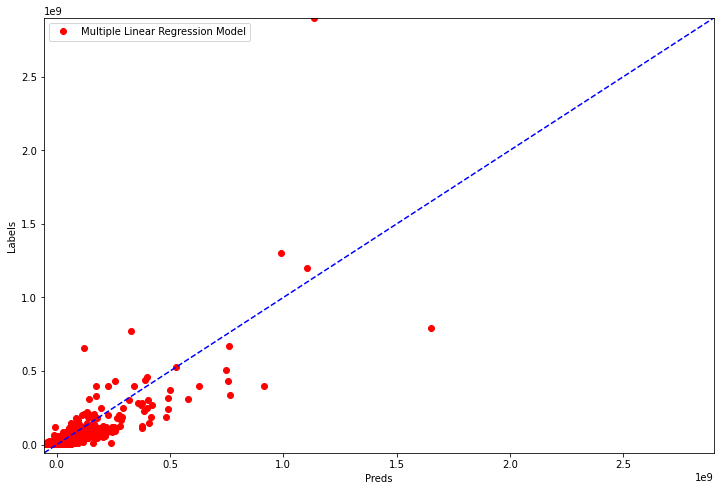

In [15]:
preds = model.predict(test_set[attributes])

price_preds = [convert_price_values(y) for y in preds]
price_labels = [convert_price_values(y) for y in test_set["Transaction-price(total)"]]
plot_predictions(price_preds, price_labels)